# Customer Analysis 

### Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business objectives
Retain customers, analyze relevant customer data, develop focused customer retention programs. Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

#### Instructions
In this final lab, we will model our data. Import sklearn train_test_split and separate the data.
Try a simple linear regression with all the data to see whether we are getting good results.
Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
Use the function to check LinearRegressor and KNeighborsRegressor.
You can check also the MLPRegressor for this task!
Check and discuss the results.

# Load datasets

In [25]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
# Load the cleaned csvs from previous labs
customers_df = pd.read_csv (r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack\lab-comparing-regression-models\files for lab\customers_df.csv")
customers_no_outliers = pd.read_csv(r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack\lab-comparing-regression-models\files for lab\customers_no_outliers.csv")
customers_outliers = pd.read_csv (r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack\lab-comparing-regression-models\files for lab\customers_outliers.csv")

In [11]:
print(customers_df.shape)
print(customers_no_outliers.shape)
print(customers_outliers.shape)

(9134, 51)
(8681, 51)
(453, 51)


In [12]:
# Check all columns for NaN values
print(customers_df.isna().sum().sum())
print(customers_no_outliers.isna().sum().sum())
print(customers_outliers.isna().sum().sum())

0
0
0


In [13]:
print(customers_df.duplicated().sum())
print(customers_no_outliers.duplicated().sum())
print(customers_outliers.duplicated().sum())

0
0
0


In [21]:
customers_df.columns
numerical_columns = customers_df.select_dtypes(include=['number']).columns.tolist()
customers_df = customers_df[['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'day',
 'month',
 'year',
 'coverage_ordinal',
 'employment_status_ordinal',
 'location_code_ordinal',
 'vehicle_size_ordinal']]
customers_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year,coverage_ordinal,employment_status_ordinal,location_code_ordinal,vehicle_size_ordinal
0,2763.519279,56274,69,32,5,0,1,384.811147,24,2,2011,0,2,1,1
1,6979.535903,0,94,13,42,0,8,1131.464935,31,1,2011,1,0,1,1
2,12887.431650,48767,108,18,38,0,2,566.472247,19,2,2011,2,2,1,1
3,7645.861827,0,106,18,65,0,7,529.881344,20,1,2011,0,0,1,1
4,2813.692575,43836,73,12,44,0,1,138.130879,3,2,2011,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,10,2,2011,0,2,2,1
9130,3096.511217,21604,79,14,28,0,1,379.200000,12,2,2011,1,2,1,1
9131,8163.890428,0,85,9,37,3,2,790.784983,6,2,2011,1,0,1,1
9132,7524.442436,21941,96,34,3,0,3,691.200000,3,2,2011,1,2,1,2


In [22]:
customers_no_outliers.columns
numerical_columns = customers_no_outliers.select_dtypes(include=['number']).columns.tolist()
customers_no_outliers = customers_no_outliers[['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'day',
 'month',
 'year',
 'coverage_ordinal',
 'employment_status_ordinal',
 'location_code_ordinal',
 'vehicle_size_ordinal']]
customers_no_outliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year,coverage_ordinal,employment_status_ordinal,location_code_ordinal,vehicle_size_ordinal
0,2763.519279,56274,69,32,5,0,1,384.811147,24,2,2011,0,2,1,1
1,12887.431650,48767,108,18,38,0,2,566.472247,19,2,2011,2,2,1,1
2,7645.861827,0,106,18,65,0,7,529.881344,20,1,2011,0,0,1,1
3,2813.692575,43836,73,12,44,0,1,138.130879,3,2,2011,0,2,0,1
4,8256.297800,62902,69,14,94,0,2,159.383042,25,1,2011,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,23405.987980,71941,73,18,89,0,2,198.234764,10,2,2011,0,2,2,1
8677,3096.511217,21604,79,14,28,0,1,379.200000,12,2,2011,1,2,1,1
8678,8163.890428,0,85,9,37,3,2,790.784983,6,2,2011,1,0,1,1
8679,7524.442436,21941,96,34,3,0,3,691.200000,3,2,2011,1,2,1,2


In [23]:
customers_outliers.columns
numerical_columns = customers_outliers.select_dtypes(include=['number']).columns.tolist()
customers_outliers = customers_outliers[['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'day',
 'month',
 'year',
 'coverage_ordinal',
 'employment_status_ordinal',
 'location_code_ordinal',
 'vehicle_size_ordinal']]
customers_outliers

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year,coverage_ordinal,employment_status_ordinal,location_code_ordinal,vehicle_size_ordinal
0,6979.535903,0,94,13,42,0,8,1131.464935,31,1,2011,1,0,1,1
1,6781.270203,0,104,30,3,1,5,982.399613,4,2,2011,0,0,1,1
2,4022.963529,0,117,6,1,0,1,975.107098,26,1,2011,0,0,1,1
3,9047.119209,0,127,30,11,0,6,1087.995426,21,1,2011,1,0,1,1
4,16936.271470,39411,217,4,29,2,4,1122.658899,24,1,2011,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,32104.699570,89546,266,4,18,1,2,2452.894264,16,2,2011,2,2,1,2
449,15245.254950,30205,195,24,1,0,4,1329.957905,1,1,2011,0,2,1,2
450,5619.689084,0,153,25,5,0,1,1027.000029,26,1,2011,2,0,1,1
451,3622.872124,0,108,23,52,0,1,1254.177129,25,1,2011,0,0,1,1


### Correlations and Model: customers_df

In [86]:
correlations_customers_df = customers_df.corr()['total_claim_amount']
correlations_customers_df.sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
coverage_ordinal                 0.279078
location_code_ordinal            0.254766
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
month                            0.006820
months_since_policy_inception    0.003335
number_of_policies              -0.002354
day                             -0.005707
number_of_open_complaints       -0.014241
vehicle_size_ordinal            -0.073799
employment_status_ordinal       -0.338575
income                          -0.355254
year                                  NaN
Name: total_claim_amount, dtype: float64

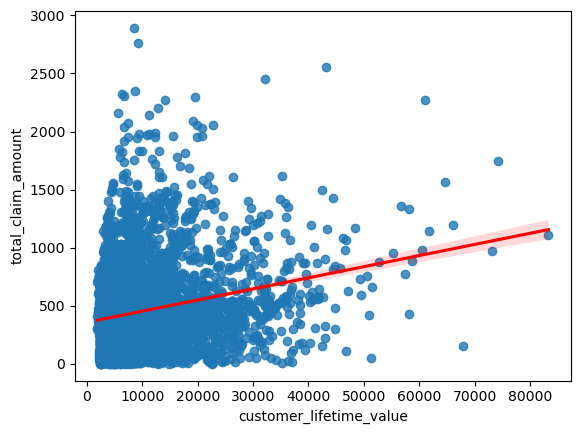

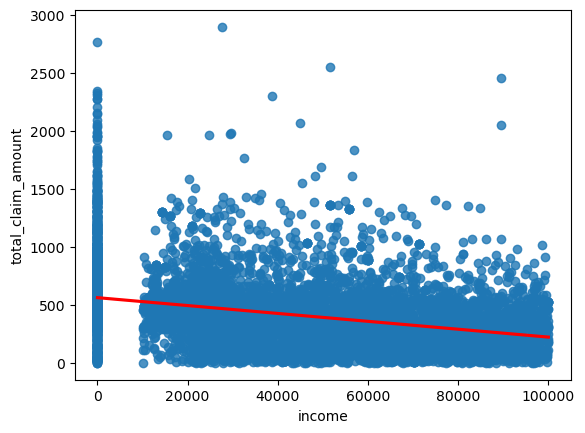

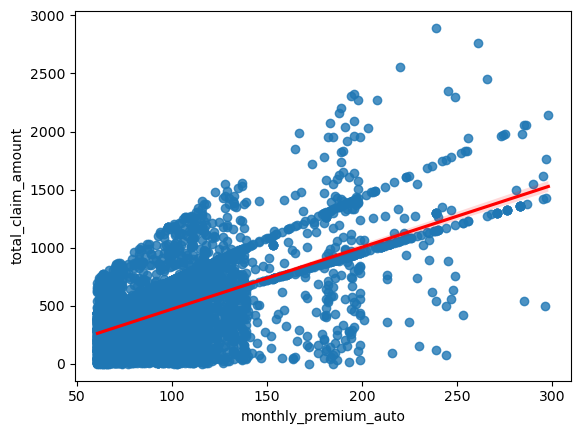

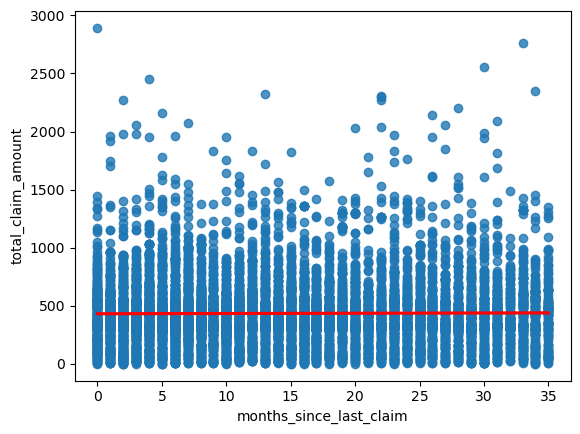

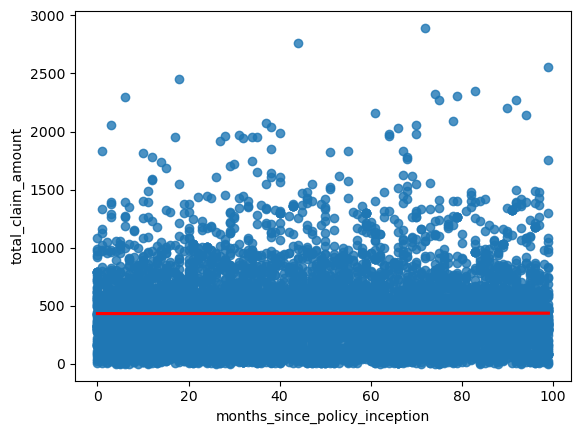

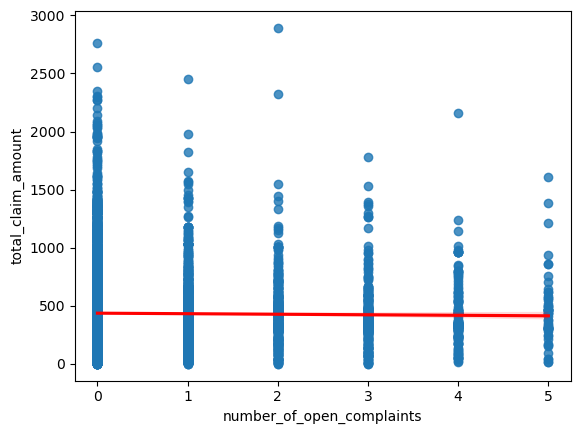

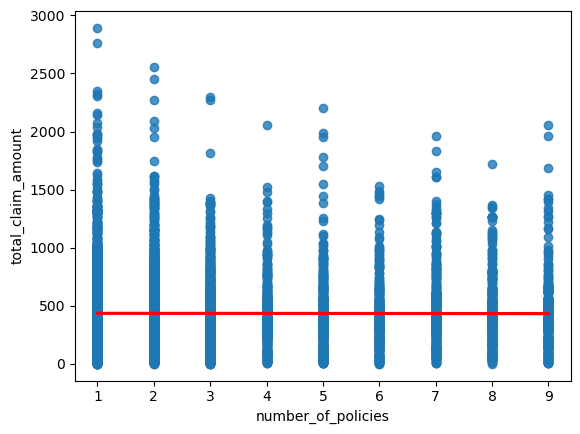

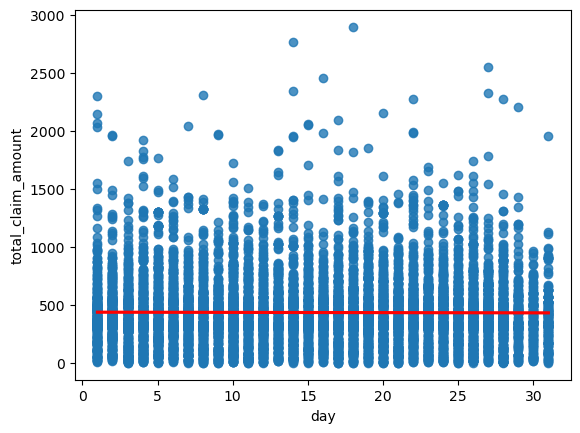

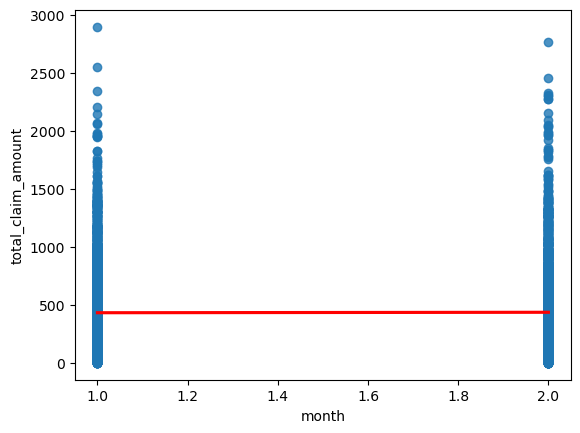

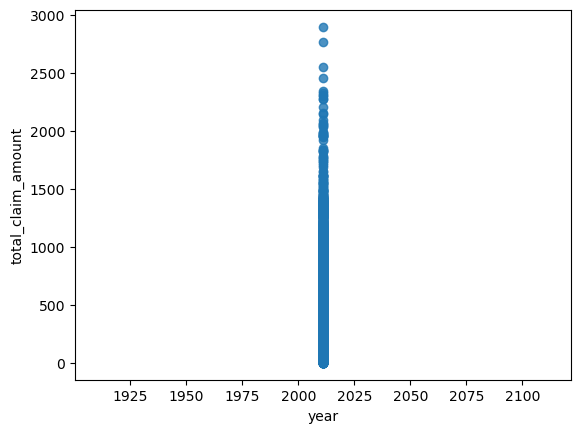

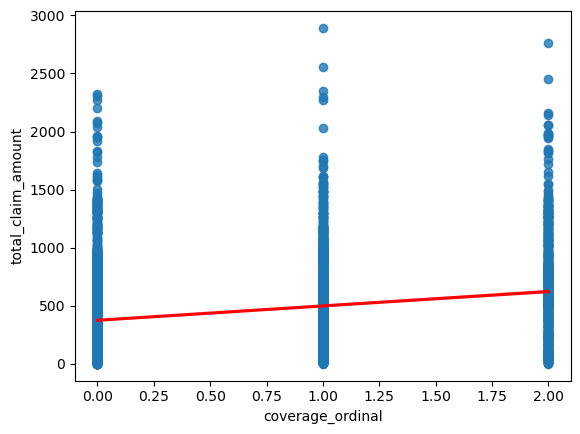

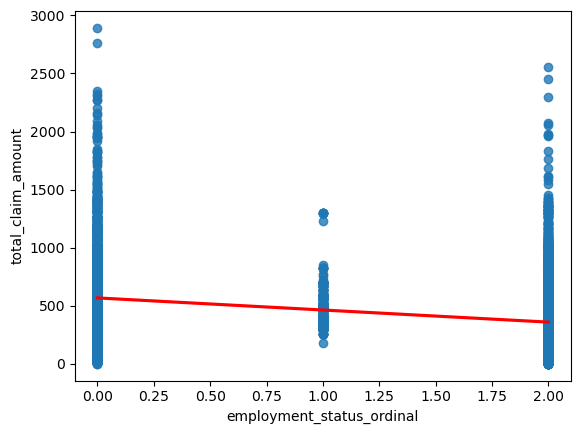

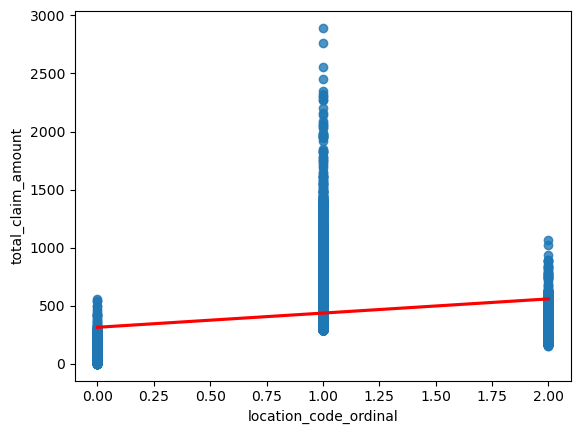

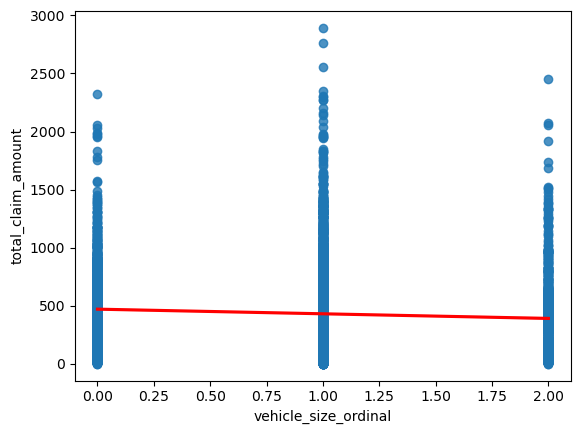

In [87]:
def plot_corr(customers_df, target_variable='total_claim_amount'): 
    for column in customers_df:
        if column != target_variable:
            sns.regplot(x=column, y=target_variable, data=customers_df, scatter=True, line_kws={"color": "red"})
            plt.show()

plot_corr(customers_df)

# as we already knew, there are many outliers

In [88]:
# Linear regression

from sklearn.model_selection import train_test_split

Y = customers_df['total_claim_amount']
X = customers_df[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

X = sm.add_constant(X)
model = sm.OLS(Y_train,X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              8408.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:41:35   Log-Likelihood:                         -48528.
No. Observations:                7307   AIC:                                  9.707e+04
Df Residuals:                    7301   BIC:                                  9.711e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
monthly_premium_auto          5.1192      0.056     91.206      0.000       5.009       5.229
employment_status_ordinal   -56.2091      3.765    -14.930      0.000     -63.589     -48.829
income                       -0.0019      0.000    -16.359      0.000      -0.002      -0.002
coverage_ordinal             -1.8044      3.686     -0.490      0.624      -9.030       5.421
location_code_ordinal       109.9975      3.203     34.342      0.000     103.719     116.276
customer_lifetime_value      -0.0005      0.000     -1.353      0.176      -0.001       0.000
==============================================================================
Omnibus:                     1405.868   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7667.443
Skew:                           0.815   Prob(JB):                         0.00
Kurtosis:                       7.746   Cond. No.                     8.53e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

# not a very good result

R2 value is =  0.57
The intercept of the model is =  -32.46264194092652
The coefficients of the model are =  [ 5.32952738e+00 -5.37686715e+01 -1.87781294e-03 -4.05450973e+00
  1.16703893e+02 -4.64735577e-04]
The mse of the model is =  36411.266431489355
The root mse of the model is =  190.8173640722703
The mean absolute error of the model is =  140.324086132157


In [91]:
validation = pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
validation['diff'] = (validation['Predicted'] - validation['Actual'])/validation['Actual']
validation['diff'].mean() # 90%
validation.sort_values('diff')

,Actual,Predicted,diff
7321,154.713524,22.649102,-0.853606
7081,89.398794,16.402046,-0.816529
4696,151.973156,34.419922,-0.773513
7616,162.557048,40.018554,-0.753818
5320,126.634634,36.391330,-0.712627
...,...,...,...
8888,6.342791,383.609685,59.479635
3234,4.074222,338.034883,81.969186
2065,3.468912,318.123101,90.706881
3723,2.549986,257.607576,100.023133


In [92]:
# let's try KNN method

Y = customers_df['total_claim_amount']
X = customers_df[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train a K-Nearest Neighbors classifier with 5 neighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsRegressor()

In [93]:
# Predict on the test set
predictions = model.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

# this is worse

R2 value is =  0.24
The intercept of the model is =  -32.46264194092652
The coefficients of the model are =  [ 5.32952738e+00 -5.37686715e+01 -1.87781294e-03 -4.05450973e+00
  1.16703893e+02 -4.64735577e-04]
The mse of the model is =  64545.9818171272
The root mse of the model is =  254.0590124697945
The mean absolute error of the model is =  172.4433232113848


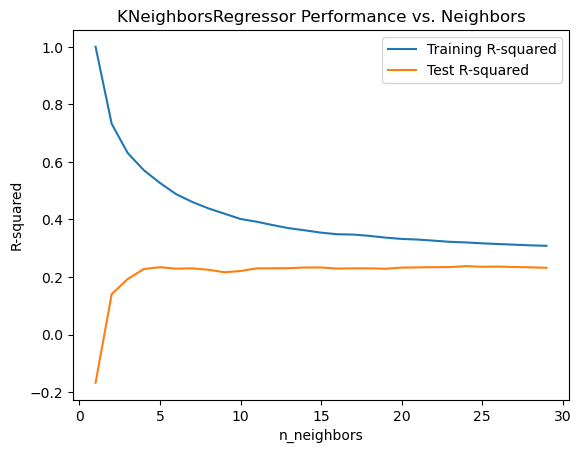

In [56]:
import matplotlib.pyplot as plt

training_performance = []
test_performance = []

# Range of 'n_neighbors' to test
neighbors_settings = range(1, 30)

# Loop through each value in 'n_neighbors' to build, train, and test the model
for n_neighbors in neighbors_settings:
    # Create and train the model
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # Record training set R-squared
    training_performance.append(clf.score(X_train, y_train))
    
    # Record test set R-squared
    test_performance.append(clf.score(X_test, y_test))

# Plot the results
plt.plot(neighbors_settings, training_performance, label="Training R-squared")
plt.plot(neighbors_settings, test_performance, label="Test R-squared")
plt.ylabel("R-squared")
plt.xlabel("n_neighbors")
plt.title("KNeighborsRegressor Performance vs. Neighbors")
plt.legend()
plt.show()

### Correlations and Model: customers_no_outliers

In [97]:
correlations_customers_no_outliers = customers_no_outliers.corr()['total_claim_amount']
correlations_customers_no_outliers.sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.446886
location_code_ordinal            0.351065
coverage_ordinal                 0.226699
customer_lifetime_value          0.134456
day                              0.009115
month                            0.001490
number_of_policies              -0.012835
number_of_open_complaints       -0.015980
months_since_last_claim         -0.017016
months_since_policy_inception   -0.017188
vehicle_size_ordinal            -0.105697
employment_status_ordinal       -0.347316
income                          -0.368590
year                                  NaN
Name: total_claim_amount, dtype: float64

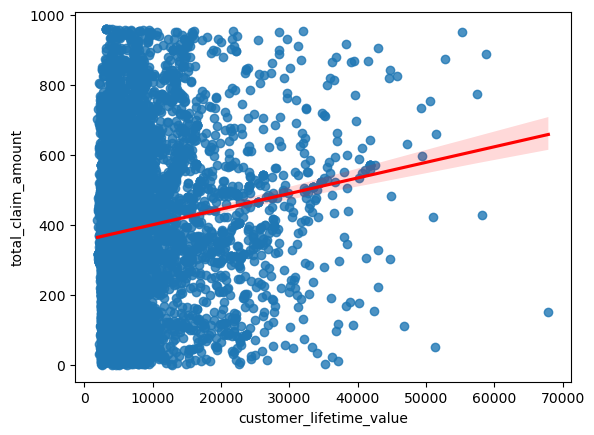

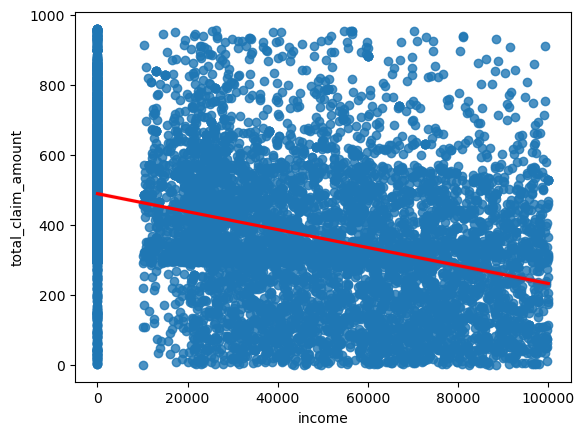

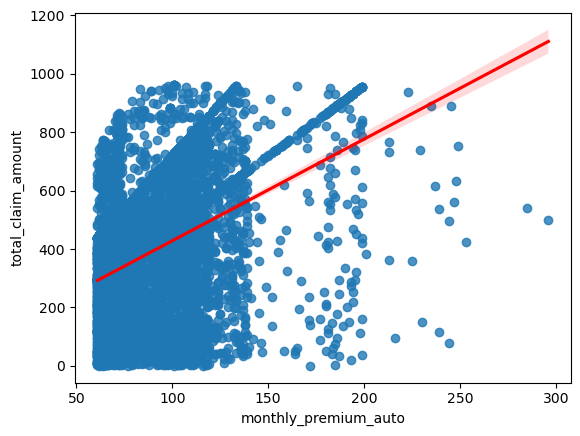

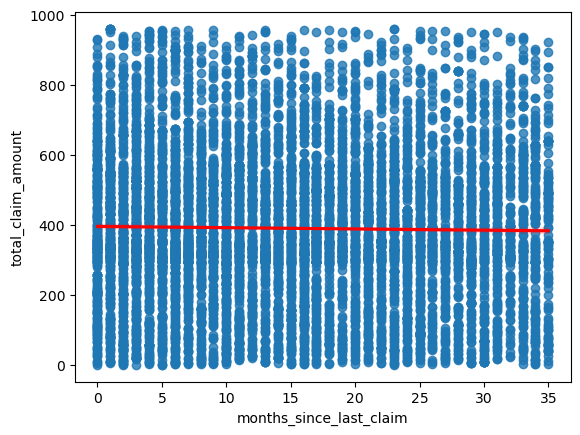

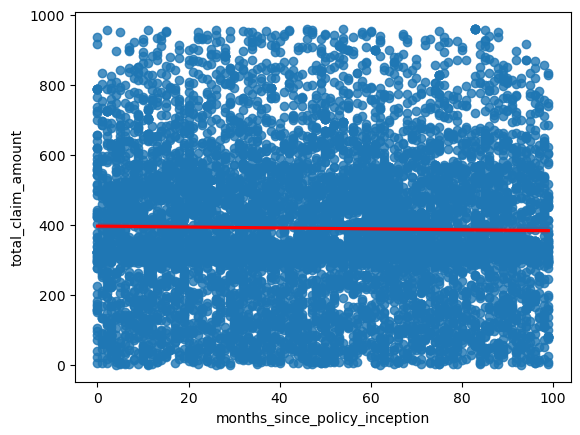

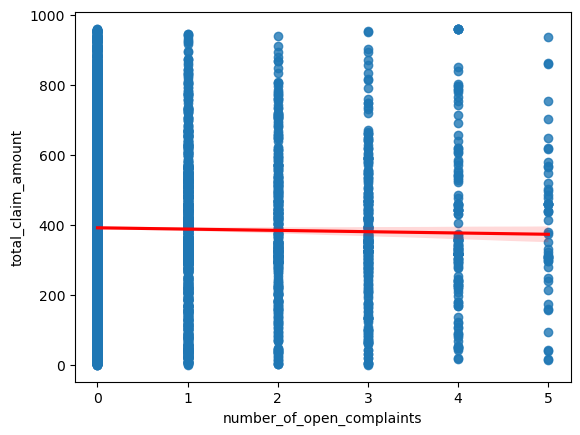

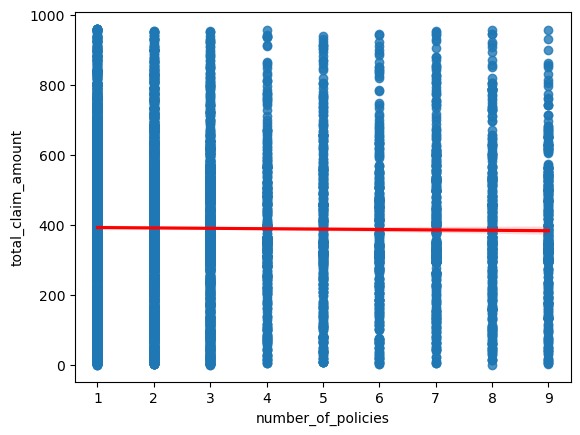

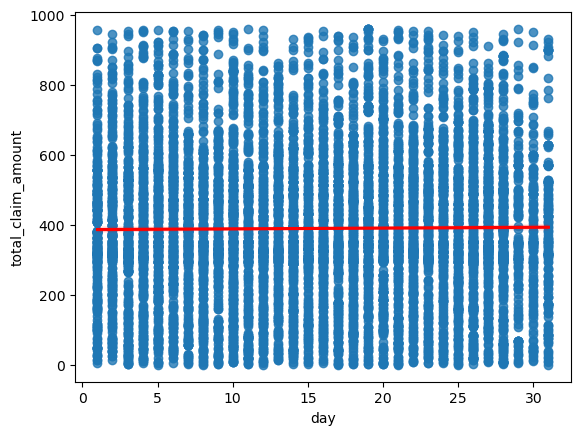

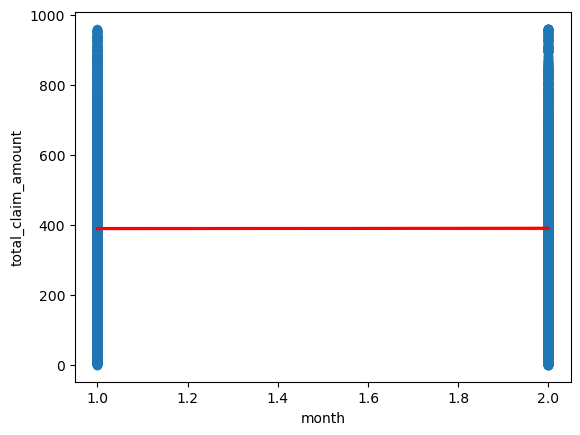

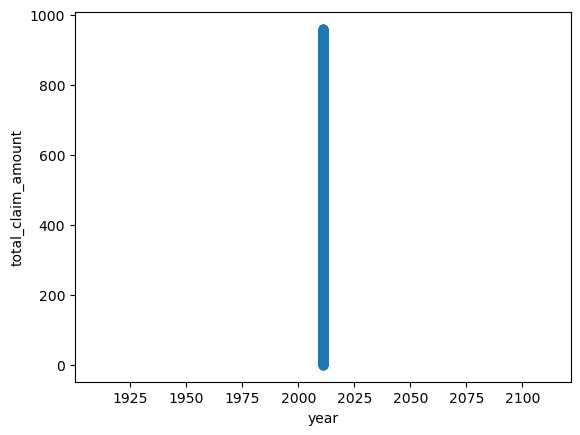

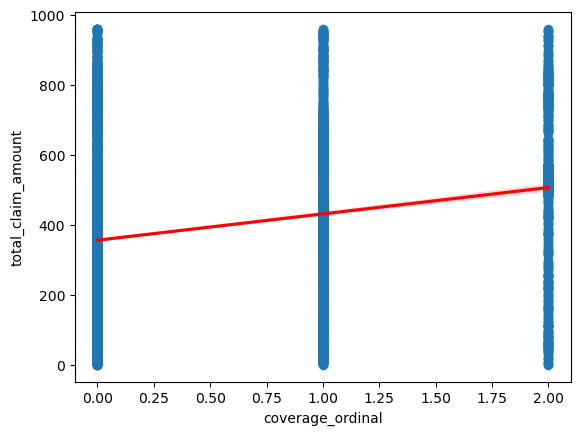

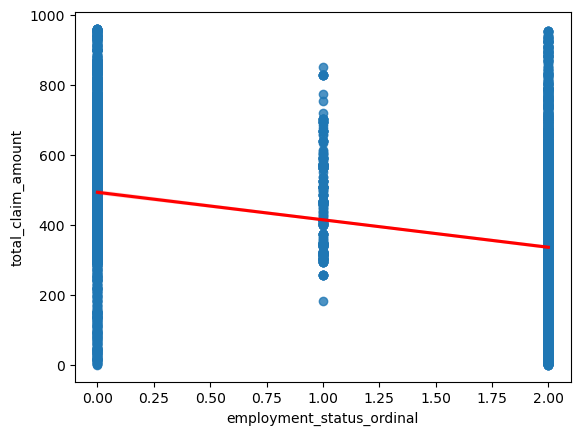

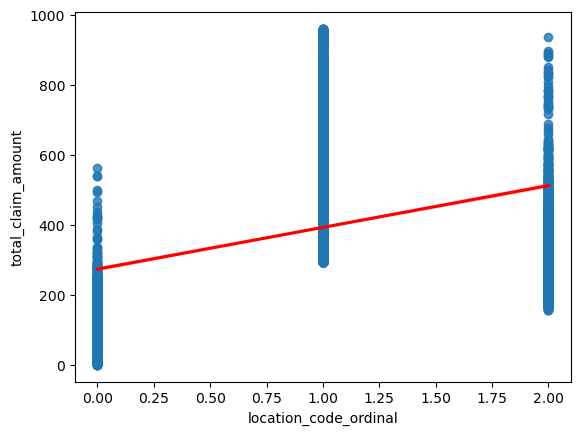

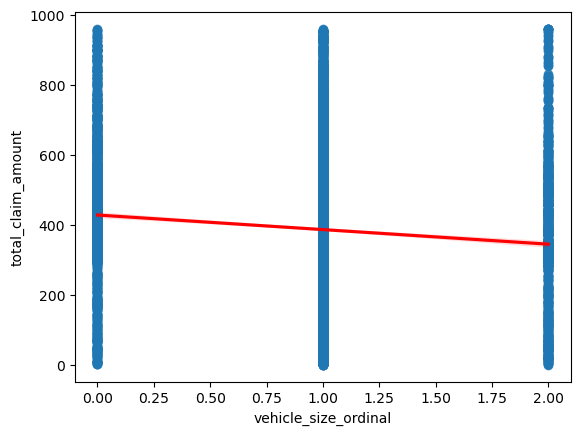

In [98]:
def plot_corr(customers_no_outliers, target_variable='total_claim_amount'): 
    for column in customers_no_outliers:
        if column != target_variable:
            sns.regplot(x=column, y=target_variable, data=customers_no_outliers, scatter=True, line_kws={"color": "red"})
            plt.show()

plot_corr(customers_no_outliers)

In [99]:
# Linear regression
Y = customers_no_outliers['total_claim_amount']
X = customers_no_outliers[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

X = sm.add_constant(X)
model = sm.OLS(Y_train,X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              8556.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:44:27   Log-Likelihood:                         -44791.
No. Observations:                6944   AIC:                                  8.959e+04
Df Residuals:                    6938   BIC:                                  8.963e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
monthly_premium_auto          4.1834      0.053     78.347      0.000       4.079       4.288
employment_status_ordinal   -35.6155      3.187    -11.176      0.000     -41.863     -29.368
income                       -0.0017   9.88e-05    -16.827      0.000      -0.002      -0.001
coverage_ordinal              3.7246      3.167      1.176      0.240      -2.484       9.933
location_code_ordinal       126.5353      2.721     46.511      0.000     121.202     131.868
customer_lifetime_value      -0.0002      0.000     -0.694      0.488      -0.001       0.000
==============================================================================
Omnibus:                       62.383   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.186
Skew:                           0.003   Prob(JB):                     1.07e-22
Kurtosis:                       3.591   Cond. No.                     8.72e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

# it has improved so far compared to customers_df

R2 value is =  0.46
The intercept of the model is =  75.35351746341013
The coefficients of the model are =  [ 3.56924204e+00 -4.01229512e+01 -1.72899418e-03  1.05528412e+01
  1.15102770e+02 -1.60445127e-04]
The mse of the model is =  23417.97367501628
The root mse of the model is =  153.02932292543244
The mean absolute error of the model is =  121.31475222243965


In [105]:
validation = pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
validation['diff'] = (validation['Predicted'] - validation['Actual'])/validation['Actual']
validation['diff'].mean() # 195%
validation.sort_values('diff')

,Actual,Predicted,diff
499,787.993313,285.114077,-0.638177
4805,787.993313,285.114077,-0.638177
170,787.993313,285.114077,-0.638177
3768,905.699717,348.324832,-0.615408
2212,922.335972,358.077561,-0.611771
...,...,...,...
3088,4.074222,279.950807,67.712703
7038,2.028223,188.710113,92.042093
4459,2.540090,262.471291,102.331493
836,0.382107,266.120422,695.455239


In [77]:
# let's try KNN method

Y = customers_no_outliers['total_claim_amount']
X = customers_no_outliers[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train a K-Nearest Neighbors classifier with 10 neighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=6)

In [78]:
# Predict on the test set
predictions = model.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

# this is worse too

R2 value is =  0.18
The intercept of the model is =  75.35351746341013
The coefficients of the model are =  [ 3.56924204e+00 -4.01229512e+01 -1.72899418e-03  1.05528412e+01
  1.15102770e+02 -1.60445127e-04]
The mse of the model is =  35281.91421333015
The root mse of the model is =  187.83480564935283
The mean absolute error of the model is =  142.42859590596814


### Correlations and Model: customers_outliers

In [106]:
correlations_customers_outliers = customers_outliers.corr()['total_claim_amount']
correlations_customers_outliers.sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.414701
months_since_policy_inception    0.089750
customer_lifetime_value          0.084266
month                            0.059413
vehicle_size_ordinal             0.054450
months_since_last_claim          0.026508
number_of_open_complaints        0.011056
coverage_ordinal                -0.011197
day                             -0.030459
number_of_policies              -0.050021
location_code_ordinal           -0.050251
employment_status_ordinal       -0.089251
income                          -0.096091
year                                  NaN
Name: total_claim_amount, dtype: float64

In [107]:
# Linear regression
# correlations are different, but I have to use the same model
Y = customers_outliers['total_claim_amount']
X = customers_outliers[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

X = sm.add_constant(X)
model = sm.OLS(Y_train,X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     total_claim_amount   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1306.
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                   5.73e-239
Time:                        16:47:20   Log-Likelihood:                         -2547.0
No. Observations:                 362   AIC:                                      5106.
Df Residuals:                     356   BIC:                                      5129.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
monthly_premium_auto          3.6269      0.307     11.812      0.000       3.023       4.231
employment_status_ordinal   -39.0718     32.606     -1.198      0.232    -103.196      25.052
income                       -0.0035      0.001     -2.830      0.005      -0.006      -0.001
coverage_ordinal            -41.7093     19.718     -2.115      0.035     -80.487      -2.931
location_code_ordinal       790.7846     49.535     15.964      0.000     693.367     888.203
customer_lifetime_value      -0.0010      0.001     -0.771      0.441      -0.004       0.002
==============================================================================
Omnibus:                      100.800   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.378
Skew:                           1.178   Prob(JB):                     2.52e-83
Kurtosis:                       7.435   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,Y_train)

predictions = lm.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.32
The intercept of the model is =  1081.0519515055794
The coefficients of the model are =  [ 3.32278565e+00 -4.30875226e+01 -2.85494132e-03 -4.80154687e+01
 -2.35062373e+02 -6.07178896e-04]
The mse of the model is =  67074.83990201615
The root mse of the model is =  258.98810764592287
The mean absolute error of the model is =  178.4223063235769


In [110]:
validation = pd.DataFrame({'Actual':Y_test, 'Predicted':predictions})
validation['diff'] = (validation['Predicted'] - validation['Actual'])/validation['Actual']
validation['diff'].mean() # 4%
validation.sort_values('diff')

,Actual,Predicted,diff
448,2452.894264,1272.502707,-0.481224
160,2327.166394,1493.379572,-0.358284
311,2052.000000,1341.725202,-0.346138
452,1950.725547,1352.607968,-0.306613
241,2042.569089,1476.537832,-0.277117
...,...,...,...
438,979.200000,1246.936187,0.273423
391,964.800000,1240.222222,0.285471
170,1142.400000,1551.242965,0.357881
134,1012.800000,1489.549000,0.470724


In [111]:
# let's try KNN method

Y = customers_no_outliers['total_claim_amount']
X = customers_no_outliers[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Train a K-Nearest Neighbors classifier with 10 neighbors
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=6)
model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=6)

In [112]:
# Predict on the test set
predictions = model.predict(X_test)

print("R2 value is = ",round(r2_score(Y_test, predictions),2))
print("The intercept of the model is = ",lm.intercept_)
print("The coefficients of the model are = ",lm.coef_)

mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

# this one improved compared to linear

R2 value is =  0.18
The intercept of the model is =  1081.0519515055794
The coefficients of the model are =  [ 3.32278565e+00 -4.30875226e+01 -2.85494132e-03 -4.80154687e+01
 -2.35062373e+02 -6.07178896e-04]
The mse of the model is =  35281.91421333015
The root mse of the model is =  187.83480564935283
The mean absolute error of the model is =  142.42859590596814


## Conclusion

#### The variables chosen were:
    
Y = customers_df['total_claim_amount']

X = customers_df[['monthly_premium_auto', 'employment_status_ordinal', 'income', 'coverage_ordinal','location_code_ordinal','customer_lifetime_value']]

#### Linear regression models showed better results than KNN models.

Compared results:
    
#### Customers_df

R2 value is =  0.57

The mse of the model is =  36411.266431489355

The root mse of the model is =  190.8173640722703

The mean absolute error of the model is =  140.324086132157

#### no_outliers

R2 value is =  0.46

The mse of the model is =  23417.97367501628

The root mse of the model is =  153.02932292543244

The mean absolute error of the model is =  121.31475222243965

#### outliers

R2 value is =  0.32

The mse of the model is =  67074.83990201615

The root mse of the model is =  258.98810764592287

The mean absolute error of the model is =  178.4223063235769


#### Weighted average

In [114]:
customers_df['total_claim_amount'].sum()

3964967.0472540003

In [117]:
# SUM * (RMSE /SUM + RMSE)
3964967.0472540003 * (190.8173640722703/(3964967.0472540003+190.8173640722703))

190.8081812685397

In [115]:
customers_no_outliers['total_claim_amount'].sum()

3385893.5139689995

In [116]:
customers_outliers['total_claim_amount'].sum()

579073.533285

In [118]:
# SUM * (RMSE /SUM + RMSE) + SUM * (RMSE /SUM + RMSE)

(3385893.5139689995*(153.02932292543244/(153.02932292543244+3385893.5139689995))) + (579073.533285*(258.98810764592287/(258.98810764592287+579073.533285)))

411.89473503129676

The general model, although not very good, was still the best option of the three.

Event though it would compromise interpretability, perhaps we should standardize the data since values are in very different scales.